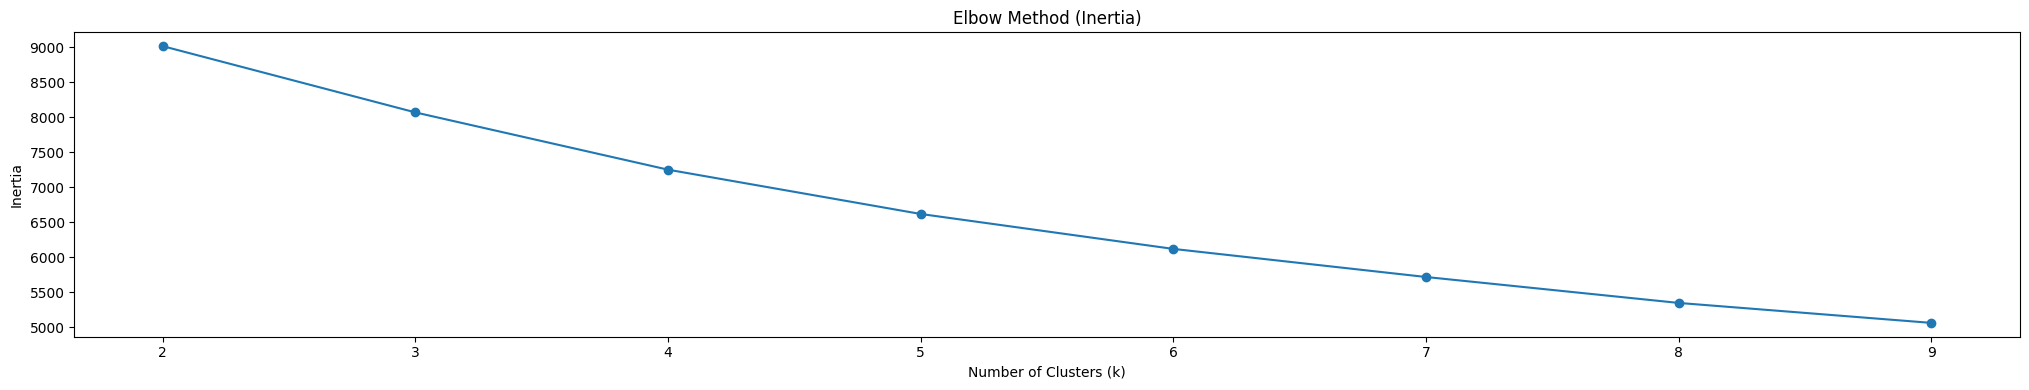

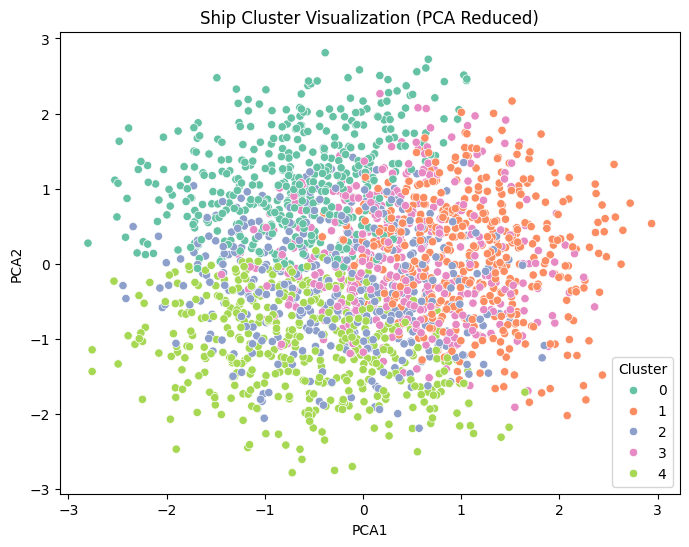

         Efficiency_nm_per_kWh  Operational_Cost_USD  Revenue_per_Voyage_USD  \
Cluster                                                                        
0                     1.138454         170570.361372           560445.822969   
1                     1.089830         364945.278262           619065.250997   
2                     0.622370         152539.583934           448959.853423   
3                     0.502537         379286.527022           577812.913238   
4                     0.547982         213848.614205           403918.543853   

         Engine_Power_kW  Speed_Over_Ground_knots  
Cluster                                            
0            1759.438968                21.463177  
1            1825.227637                14.339341  
2            1125.112340                15.134578  
3            1440.873076                20.426046  
4            2524.022693                16.676083  


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('Ship_Performance_Dataset.csv')

# Preview the data
#print(df.head())

#Drop rows with missing values
df.dropna(inplace=True)

# Select features for clustering
features = [
    'Efficiency_nm_per_kWh', 
    'Operational_Cost_USD', 
    'Revenue_per_Voyage_USD', 
    'Engine_Power_kW', 
    'Speed_Over_Ground_knots'
]

X = df[features]

#Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Find the optimal number of clusters using the elbow method
inertia = []

K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#Plot elbow
plt.figure(figsize=(40, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

#Choose optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

#Add cluster labels to original data
df['Cluster'] = clusters

#Use PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Ship Cluster Visualization (PCA Reduced)')
plt.show()



# Show cluster summary
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


In [50]:
# Check most common ship types per cluster
for col in ['Ship_Type', 'Engine_Type', 'Route_Type']:
    print(f"\n--- {col} by Cluster ---")
    print(df.groupby('Cluster')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'))



--- Ship_Type by Cluster ---
Cluster
0            Tanker
1    Container Ship
2      Fish Carrier
3      Bulk Carrier
4      Bulk Carrier
Name: Ship_Type, dtype: object

--- Engine_Type by Cluster ---
Cluster
0                  Diesel
1           Steam Turbine
2                  Diesel
3    Heavy Fuel Oil (HFO)
4    Heavy Fuel Oil (HFO)
Name: Engine_Type, dtype: object

--- Route_Type by Cluster ---
Cluster
0      Short-haul
1    Transoceanic
2         Coastal
3       Long-haul
4       Long-haul
Name: Route_Type, dtype: object


In [31]:
 # Check modal (most common) values of key categorical columns by cluster
categorical_cols = ['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status', 'Weather_Condition']

for col in categorical_cols:
    print(f"\nMost common {col} in each cluster:")
    print(df.groupby('Cluster')[col].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'))



Most common Ship_Type in each cluster:
Cluster
0            Tanker
1    Container Ship
2      Fish Carrier
3      Bulk Carrier
4      Bulk Carrier
Name: Ship_Type, dtype: object

Most common Route_Type in each cluster:
Cluster
0      Short-haul
1    Transoceanic
2         Coastal
3       Long-haul
4       Long-haul
Name: Route_Type, dtype: object

Most common Engine_Type in each cluster:
Cluster
0                  Diesel
1           Steam Turbine
2                  Diesel
3    Heavy Fuel Oil (HFO)
4    Heavy Fuel Oil (HFO)
Name: Engine_Type, dtype: object

Most common Maintenance_Status in each cluster:
Cluster
0        Good
1    Critical
2        Fair
3        Fair
4    Critical
Name: Maintenance_Status, dtype: object

Most common Weather_Condition in each cluster:
Cluster
0        Calm
1    Moderate
2        Calm
3    Moderate
4    Moderate
Name: Weather_Condition, dtype: object


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []

K = range(2, 11)  # k must be at least 2 for silhouette

print(f"{'k':<3} {'Elbow Score':<15}")
print("-" * 35)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    inertia_val = kmeans.inertia_
    #silhouette_val = silhouette_score(X_scaled, labels)

    inertia.append(inertia_val)
    #silhouette_scores.append(silhouette_val)

    print(f"{k:<3} {inertia_val:<15.2f}")


k   Elbow Score    
-----------------------------------
2   9017.13        
3   8070.58        
4   7252.76        
5   6620.13        
6   6121.16        
7   5720.01        
8   5349.62        
9   5064.55        
10  4759.09        
